In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

# Regresión Lineal

### Laboratorio de Datos, IC - FCEN - UBA - 1er. Cuatrimestre 2024



Queremos utilizar un modelo lineal:
$$ Y = \beta_0 + \beta_1 X $$
para intentar predecir valores continuos.

Con lo que hemos visto las clases anteriores, visualizar la recta que mejor aproxima a los datos en el sentido de cuadrados mínimos es relativamente sencillo con `seaborn objects`, ya que `seaborn` calcula automáticamente los valores de $\beta_0$ y $\beta_1$.

En el archivo `inmuebles.csv` tenemos datos sobre inmuebles que están a la venta en cierta ciudad: su superficie en $m^2$, su precio y la zona de la ciudad donde se encuentra.


In [4]:
# Cargamos el dataset inmuebles.csv
datos = pd.read_csv('datos/inmuebles.csv')
datos.head()

,metros_cuad,precio,zona
0,110.0,454.425690,Z2
1,109.0,383.004114,Z2
2,101.0,437.362638,Z2
3,58.0,304.392486,Z3
4,129.0,620.027722,Z3


Visualizamos los datos con `so.Plot` (repasar clase de visualización)

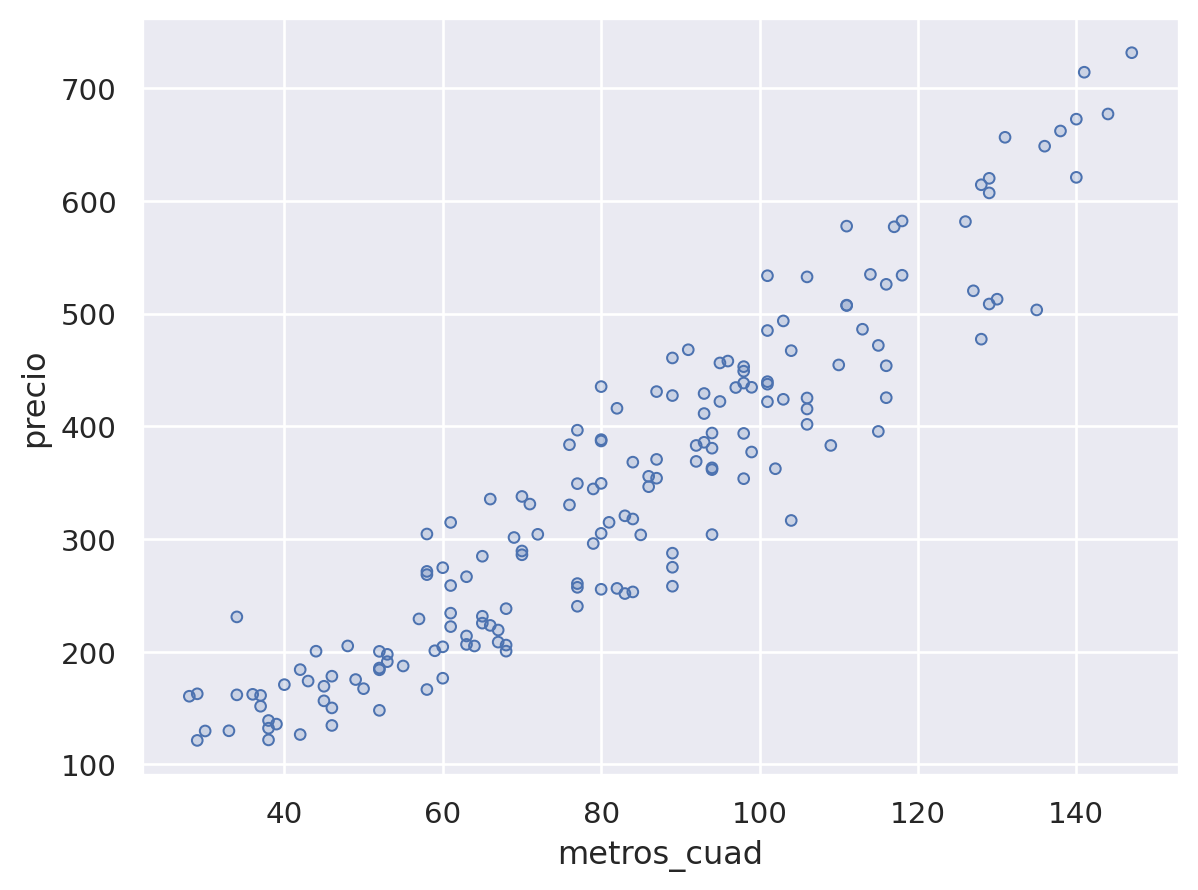

In [5]:
(
    so.Plot(data=datos, x='metros_cuad', y='precio')
    .add(so.Dots())
)

Para visualizar la recta de la regresión, agregamos una línea al gráfico (`so.Line()`) junto a `so.PolyFit(1)`:

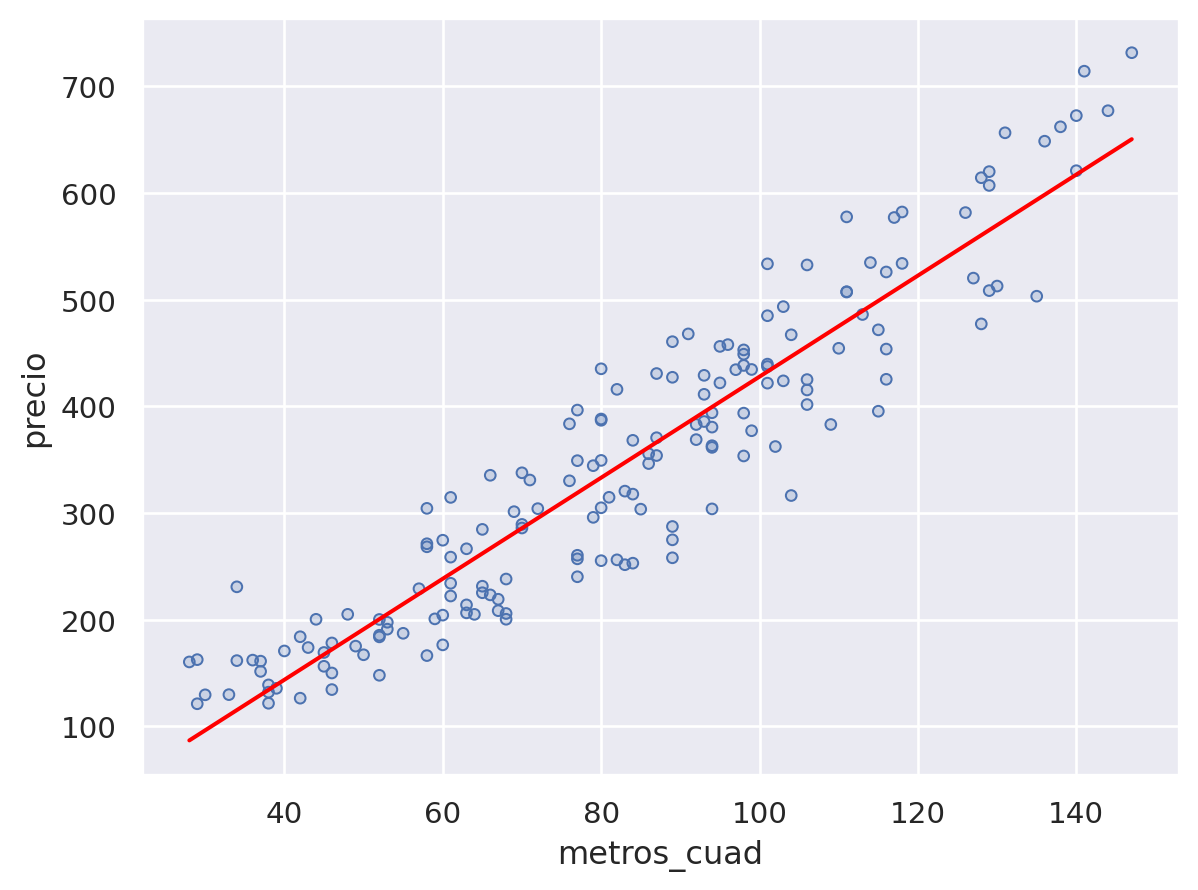

In [13]:
(
    so.Plot(data=datos, x='metros_cuad', y='precio')
    .add(so.Dots())
    .add(so.Line(color='red'), so.PolyFit(1))
)

Desafortunamente, `seaborn` no nos devuelve los valores de $\beta_0$ y $\beta_1$, que son importantes en la interpretación del resultado.

Hemos visto que podemos calcular los coeficientes de la regresión lineal como:

 $$
 \begin{array}{rl}
      \hat{\beta}_1 = & \dfrac{\displaystyle\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\displaystyle\sum_{i=1}^n(x_i - \bar{x})^2}  \\[1em]
      \hat{\beta}_0 = & \bar{y} - \hat{\beta}_1\bar{x}
 \end{array}
 $$

 pero también podemos utilizar la función `polyfit` de `numpy`:

In [32]:
coeficientes = np.polyfit(x=datos['metros_cuad'], y=datos['precio'], deg=1)    # deg es el grado del polinomio
display(coeficientes)

array([  4.73579682, -45.73153403])

`polyfit` devuelve un _array_ con los coeficientes del polinomio en orden decreciente según la potencia de $x$. En nuestro caso, `polyfit` devuelve un array  $(\beta_1, \beta_0)$ (en ese orden).

In [20]:
# Tambien podemos escribir
beta_1, beta_0 = np.polyfit(x=datos['metros_cuad'], y=datos['precio'], deg=1)
print('Valor de beta_1:', beta_1)
print('Valor de beta_0:', beta_0)

Valor de beta_1: 4.735796822302394
Valor de beta_0: -45.731534030925715


Entonces, la recta que mejor aproxima a los datos es (redondeando):
$$ Y = -45.73 + 4.74 X$$

Una interpretación que podemos darle a este resultado es que, en esta ciudad, el $m^2$ cuesta $ 4.74

Con los valores de $\beta_0$ y $\beta_1$ podemos predecir cuanto costará un inmueble según su superficie. Supongamos que queremos predecir el valor de una casa de $120m^2$. Evaluamos $120$ en nuestra recta, utilizando la función `polyval` de `numpy`:

In [22]:
prediccion = np.polyval([beta_1, beta_0], 120)
display(prediccion)

522.5640846453616

Según nuestro modelo, la casa costará aproximadamente \\$522.56. También podemos predecir el costo de una casa con una superficie mayor a cualquiera que las que aparecen en los datos. Por ejemplo, una casa de $200m^2$:

In [24]:
prediccion = np.polyval([beta_1, beta_0], 200)
display(prediccion)

901.4278304295531

`polyval` también acepta un numpy array o un pandas series. En ese caso, evalúa el polinomio en cada elemento del array:

In [33]:
prediccion = np.polyval([beta_1, beta_0], np.array([200, 120]))
display(prediccion)

array([901.42783043, 522.56408465])

Calculemos el Error Cuadrático Medio: